# Transformações geométricas - APS de Visão

## Criação da imagem

Vamos gerar uma imagem de entrada com algumas coordenadas conhecidas.  Desta seção você só vai precisar das coordenadas dos pontos na imagem de entrada e na imagem de saída

In [1]:
import matplotlib.pyplot as plt

from matplotlib import colors

import cv2

import numpy as np

%matplotlib inline


sp_x = 30
sp_y = 30
x_blocks = 6
y_blocks = 6

In [2]:
# Cria uma imagem RGB  em branco
blank = 255*np.ones((sp_x * x_blocks,sp_y*y_blocks,3), np.uint8)

In [3]:
# Coordenadas de entrada de alguns pontos
points = [[1,1],
          [5,1],
          [1,3],
          [3,3],
          [5,3],
          [1,5],
          [5,5]]

In [4]:
# Cores a usar para os pontos
point_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

## Coordenadas dos pontos na imagem de entrada

Este loop imprime as coordenadas.

As cores dos pontos servem para identificá-los

In [5]:
sp_x = 30 # x spacing
sp_y = 30 # y spacing
point_size = 5
print("Posição dos pontos: (x_entrada, y_entrada)")

for i in range(len(points)):
    point_color = [int(255*canal) for canal in colors.colorConverter.colors[point_colors[i]]]
    point_position = (sp_x*points[i][0], sp_y*points[i][1])
    print(point_position)
    cv2.circle(blank,point_position, point_size, point_color, -1)


Posição dos pontos: (x_entrada, y_entrada)
(30, 30)
(150, 30)
(30, 90)
(90, 90)
(150, 90)
(30, 150)
(150, 150)


## Imagem de entrada

Tudo o que foi geito até agora teve como única finalidade gerar esta imagem, que será gravada no arquivo `dots_pattern.png` .

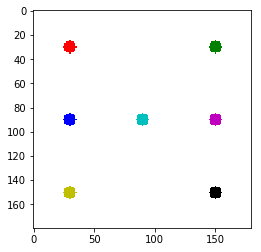

In [6]:
plt.imshow(blank)

Se precisar abrir a imagem fora deste *notebook*, use o arquivo `dots_pattern.png`


In [7]:
cv2.imwrite("dots_pattern.png", blank)

True

## Padrão de saída

Foi aplicada uma transformação à imagem de entrada, que gerou o seguinte padrão de saída:

In [8]:
saida = cv2.imread("patterns_transformed.png")

saida_rgb = cv2.cvtColor(saida, cv2.COLOR_BGR2RGB)

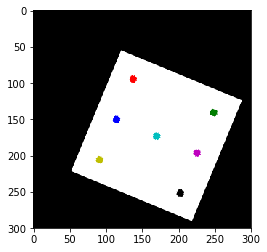

In [9]:
plt.imshow(saida)

Sabe-se que a imagem de saída é igual a uma combinação de rotações em torno de um ponto arbitrário e  redimensionamentos (escala) da imagem de entrada. Para simplificar, assuma que o redimensionamento é igual nos eixos $x$ e $y$

Cada ponto da imagem de saída está relacionado à sua posição na imagem de entrada pela seguinte transformação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 = 
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix} 
$$

Na equação acima:

$\alpha = escala \cdot \cos(\theta)$ 

$\beta = escala \cdot \sin(\theta) $ 

$x_{entrada}$ é a posição $x$ de cada pixel na imagem de entrada

$y_{entrada}$ é a posição $y$ de cada pixel na imagem de entrada

$center$ é o centro de rotação

$x_{saída}$ é a coordenada $x$ do pixel na imagem de saída

$y_{saída}$ é a coordenada $y$ do pixel na imagem de saída


Com translação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 =
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) + t_x \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) + t_y \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix}
$$



# Matrizes de transformação com rotação, translação e escala


O objetivo desta seção é só entender a forma da transformação de saída expressa na equação que fecha a seção anterior.

Uma matriz de translação por uma distância $ [ x_t   y_t ]$ em 2D é:

$$
T = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz de rotação por um ângulo $\theta$ é:

$$
R = \begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz que aplica um fator de escala  $s$ igual nos eixos $x$ e $y$ é:


$$
S = \begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$


Uma transformação genérica, composta de rotação, escala e transação (nesta ordem) é dada por:

$$
M = T \cdot S \cdot R
$$

Ou seja:
$$
M = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Multiplicando as três matrizes, temos que uma transformação afim composta de rotação, escala e translação é:

$$
M = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$


Desta forma, um ponto de entrada representado por $( x_{i}, y_{i} ) $ será transformado num ponto de saída $(x_{saida}, y_{saida})$ quando multiplicado pela matrix $M$


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$

Teremos, então:

$$
x_{saida} = x_{i} \cdot s \cdot \cos(\theta) - y_{i} \cdot s \cdot \sin(\theta) + x_t $$
e 
$$ y_{saida} = - x_{i} \cdot s \cdot \sin(\theta) - y_{i} \cdot s \cdot \cos(\theta) + y_t
$$

Por simplicidade, ao estimar uma transformação, ajuda trabalhar com as seguintes relações:

$\alpha =  s \cdot \cos(\theta)$

e 

$\beta = s \cdot \sin(\theta) $

E encarar a matriz da seguinte forma:


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} \alpha & -\beta & x_t \\
-\beta & -\alpha & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$



# APS Visão

Responda (no IPython Notebook): 

1. Quantos graus de liberdade (variáveis) determinam a transformação acima?

2. Supondo que a transformação aplicada para transformar a imagem de entrada na imagem do arquivo `patterns_transformed.png` é desconhecida, é possível descobrir qual é esta transformação? Como?

3. Crie uma tabela para os 7 pontos de entrada fornecidos em que constem quais suas posições na imagem de entrada e depois quais suas posições após transformados, na imagem de saída.

4. Considerando o número de variáveis da matriz de transformação fornecida, de quantas correspondências $p_{entrada} \Rightarrow p_{saida}$ você precisa para descobrir qual é a matriz?

5. Por que poderia ser útil usar **mais** correspondências do que a resposta que você deu no item anterior?

6. Expanda a equação da transformação usando os pontos de entrada e saída de sua tabela até ter um sistema sobredeterminado. <font color=red> Reserve pelo menos 1 hora para esta atividade - trabalhoso </font>. Talvez você ache útil aprender a usar um *Computer Algebra System* para fazer isso, por exemplo o Sympy ou o Maxima.

7. A partir do sistema sobredeterminado que você encontrou no item anterior, resolva e estime qual é a transformação que foi usada para converter a imagem de entrada na imagem de saída. Você pode usar o método de *Least Squares* que está presente no *Scipy* ou o *RANSAC* da OpenCV, por exemplo.

8. Aplique a transformação à imagem de entrada e verifique se o resultado que obteve se assemelha à imagem de saída. A função da OpenCV que permite que você faça isso é a *cv2.warpAffine()* 

9. Abra a imagem `patterns_transformed.png`  na tela do seu celular e imprima na tela em tempo real a rotação da imagem

1) A função de transformação possui 4 graus de liberdade (as variáveis s, $\theta$, $x_{t}$, $y_{t}$).<br>

2) É possível descobrir a transformação pois, apenas comparando as imagens conseguimos detectar se ela sofreu rotação. Assim, podemos calcular o ângulo de rotação ($\theta$) por meio do arco tangente do vetor da transformação em dois pontos diferentes. E, depois, subtituimos $\theta$ nas equações da transformação para descobrir os outros valores.<br>

3) -----------Entrada------------Saída          <br>
AZULES----(30, 30)------------(137, 94)      <br>
VERDE-----(150, 30)-----------(248, 141)     <br>
VERM------(30, 90)------------(114, 150)     <br>
AZULCL----(90, 90)------------(170, 173)     <br>
ROSA------(150, 90)-----------(225, 196)     <br>
AMAR------(30, 150)-----------(92, 205)      <br>
PRETO-----(150, 150)----------(202, 251)     <br>
    
4) Seriam necessários 2 pontos para descobrir a matriz transformação.

5) Para realizar a transformação seria interressante utilizar mais correspôndencias do que o mínimo para validar a resposta obtida no processo de transformação e, também, para se certificar de que ele está sendo realizado de forma correta. Isso se dá pois o arredondamento que a tranformação realiza ao eliminar os números após a vírgula no caso de decimais pode gerar erros graves de imprecisão.

('Theta:', 0.39287050746464774)
('Escala:', 1.0012838980251526)
('Xt:', 120.85418295425441)
('Yt:', 55.00164190489147)


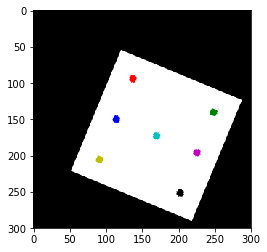

In [10]:
#6)
import math
from __future__ import division

#Foi usado o rosa, o preto e o vermelho
r1 = [150, 90]
r2 = [225, 196]
p1 = [150, 150]
p2 = [202, 251]
v1 = [30, 90]
v2 = [114, 150]

theta = math.atan2((r2[1]-v2[1]),(r2[0]-v2[0]))
s = (p2[0]-v2[0])/(p1[0]*math.cos(theta)-p1[1]*math.sin(theta)-v1[0]*math.cos(theta)+v1[1]*math.sin(theta))
xt = p2[0] + p1[1]*math.sin(theta) - p1[0]*math.cos(theta)
yt = p2[1] - p1[0]*math.sin(theta) - p1[1]*math.cos(theta)

print("Theta:", theta)
print("Escala:", s)
print("Xt:",xt)
print("Yt:",yt)

M = np.float32([[s*math.cos(theta),-s*math.sin(theta),xt],[s*math.sin(theta),s*math.cos(theta),yt]])
rows,cols,i = blank.shape
dst = cv2.warpAffine(blank,M,(300,300))
saida_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

In [11]:
def tevira(p1,p2):
#Agora, gimme duas relações de pontos dos dois planos
#p1 = [[xi,yi],[xw,yw]] #i é o plano de origem e w é o plano de destino
#p2 = [[xi,yi],[xw,yw]]
    import numpy as np
    import math
    xi1 = p1[0][0]
    yi1 = p1[0][1]
    xi2 = p2[0][0]
    yi2 = p2[0][1]
    
    #Descobrindo o ângulo da transformação
    
    iP2P1 = [(xi2-xi1),(yi2-yi1)]
    tetaI = math.atan2(iP2P1[0],iP2P1[1])
    print(tetaI)
    xw1 = p1[1][0] 
    yw1 = p1[1][1]
    xw2 = p2[1][0]
    yw2 = p2[1][1]
    
    wP2P1 = [(xw2-xw1),(yw2-yw1)]
    tetaW = math.atan2(wP2P1[0],wP2P1[1])
    print(tetaW)
    tetaF = tetaW - tetaI
    
    #Guardando o sen e cos pq sim (é mais fácil)
    senf = np.sin(tetaF)
    cosf = np.cos(tetaF)
    
    #Descobrindo o scaling no eixo X e no eixo y
    Sx = (xw2-xw1)/((xi2-xi1)*cosf - (yi2 - yi1)*senf)
    Sy = (yw2-yw1)/((xi2-xi1)*senf + (yi2 - yi1)*cosf)
    
    # Descobrindo as translações em x e y
    x0 = xw1 - yi1*Sx*senf + xi1*Sx*cosf
    y0 = yw1 - xi1*Sy*senf - yi1*Sy*cosf
    
    return tetaF,[Sx,Sy],[x0,y0]


def acha_centro(img,c_menor, c_maior):
    import cv2
    output = cv2.inRange(img, c_menor, c_maior)
    #plt.imshow(output)
    x_max = 0
    x_min = 300
    y_max = 0
    y_min = 300

    for i in range(len(output)):
        for j in range(len(output[i])):
            if output[i][j]:
                if(i < x_min):
                    x_min = i
                if(i > x_max):
                    x_max = i
                if(j < y_min):
                    y_min = j
                if(j > y_max):
                    y_max = j

    return [y_min + (y_max - y_min)/2, x_min + (x_max-x_min)/2] #a saída é [x,y], mas estava invertido


#iPontos = np.array([[30, 30],[150, 30],[30, 90],[90, 90],[150, 90],[30, 150],[150, 150]])
#30,30 azul
#90,30 vermelho
saida = cv2.imread("patterns_transformed.png")
saida_rgb = cv2.cvtColor(saida, cv2.COLOR_BGR2RGB)

azul_menor = np.array([0,0,100])
azul_maior = np.array([0, 0, 255])

verde_menor = np.array([0,100,0])
verde_maior = np.array([0,150,0])

verde_centerI = [150,30]
azul_centerI = [30,30]

verde_centerW = acha_centro(saida_rgb,verde_menor,verde_maior) #attention ESTÃO INVERTIDOS
azul_centerW = acha_centro(saida_rgb,azul_menor,azul_maior)

#azul_centerW = [137,96] 
vermelho_centerW = [115,150]

#alice[0] = [escala no X,escala no Y]
#alice[1] = [translação no X, translação no Y]


teta , escalas, trans = tevira([azul_centerI, verde_centerI],[azul_centerW, verde_centerW])

escalas


1.03037682652
0.725517798001


[0.80391566808978432, 3.776641907298766]

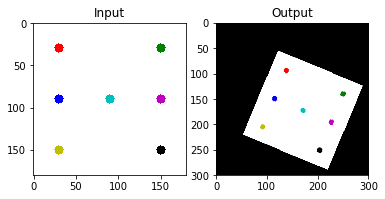

In [12]:
#6) Maneira Fácil (com funções prontas)

#300/180 = 1.66666

res = cv2.resize(blank, None, fx=1.66666, fy=1.66666, interpolation = cv2.INTER_CUBIC)
rows,cols,ch = res.shape

pts1 = np.float32([[30,30],[150,30],[150, 150]])
pts2 = np.float32([[137.54,94.46],[248.61,140.65],[202.42, 250.69]])

M = cv2.getAffineTransform(pts1*1.66666, pts2)       #M = Matriz transformação

dst = cv2.warpAffine(res,M,(cols,rows))

plt.subplot(121),plt.imshow(blank),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Referências



[Shapiro and Shepard. Computer Vision. Seção 11.2, Capítulo 11](https://courses.cs.washington.edu/courses/cse576/book/ch11.pdf)

[http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0](http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0)

